# random_forest.ipynb
The purpose of this file is creating the decision tree + random forest

### Training
We will use the 2022-2023 season to train, and the 2023-2024 season to evaluate the model

In [1]:
import pandas as pd

df_scores = pd.read_csv('datasets/2022-2023/all_scores.csv')
team_stats = pd.read_json('datasets/2022-2023/team_stats.json')

df_scores['homeWin'] = pd.to_numeric(df_scores['homeWin'], errors='coerce')

team_stats['BOS']

goals_per_game              3.658537
netPlusMinus              487.000000
totalPIM                  843.000000
PPG                        62.000000
SHG                         8.000000
shots_per_game             32.951220
goals_against_per_game      2.048780
shots_against_per_game     29.768293
wins                       54.000000
points                    135.000000
regulation_wins            54.000000
Name: BOS, dtype: float64

### Create our training variables 

In [2]:
def xs(df):
    xs = []
    for index, row in df.iterrows():
        homeAbbr = row['homeTeam']
        awayAbbr = row['awayTeam']
    
        home = team_stats[homeAbbr]
        away = team_stats[awayAbbr]

        x = {
            'home_more_goals': True if home['goals_per_game'] >= away['goals_per_game'] else False,
            'home_more_PIMs': True if home['totalPIM'] >= away['totalPIM'] else False,
            'home_more_PPG': True if home['PPG'] >= away['PPG'] else False,
            'home_more_SHG': True if home['SHG'] >= away['SHG'] else False,
            'home_more_shots': True if home['shots_per_game'] >= away['shots_per_game'] else False,
            'home_less_goals_against': True if home['goals_against_per_game'] <= away['goals_against_per_game'] else False,
            'home_less_shots_against': True if home['shots_against_per_game'] <= away['shots_against_per_game'] else False
        }
        xs.append(x)


    return pd.DataFrame(xs)


        



In [3]:
trn_xs = xs(df_scores)

In [4]:
def ys(df):
    return df['homeWin']

In [5]:
trn_y = ys(df_scores)

### Create a decision tree

In [6]:
import graphviz
import re

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s = export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))


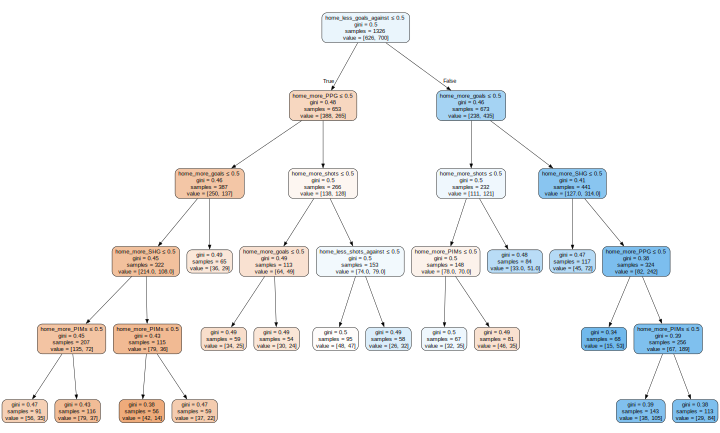

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50).fit(trn_xs, trn_y);

draw_tree(m, trn_xs, size=10)

### Create a random forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, max_depth=5, min_samples_leaf=60)
rf.fit(trn_xs, trn_y)


RandomForestClassifier(max_depth=5, min_samples_leaf=60)

In [9]:
from sklearn.metrics import accuracy_score

# Test on dataset
test_scores = pd.read_csv('datasets/2023-2024/all_scores.csv')
test_stats = pd.read_json('datasets/2023-2024/team_stats.json')

test_x = xs(test_scores)
val_y = ys(test_scores)

preds = rf.predict(test_x)
accuracy = accuracy_score(val_y, preds)
print("Accuracy:", accuracy)

Accuracy: 0.6376146788990825


### Visualize Feature Importance

<Axes: ylabel='cols'>

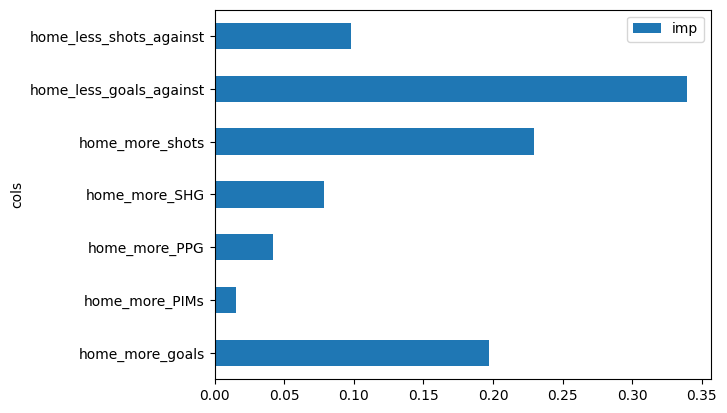

In [10]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=rf.feature_importances_)).plot('cols', 'imp', 'barh')